In [834]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [835]:
df = pd.read_csv(r'covid.csv')

In [836]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [837]:
# df = df.sample(frac=1)

In [838]:
# df.head()

In [839]:
# df.to_csv('newfile.csv')

In [840]:
df.isnull().sum()

SESSO           0
AGE             0
WBC             2
Piastrine       2
Neutrofili     70
Linfociti      70
Monociti       70
Eosinofili     70
Basofili       71
PCR             6
AST             2
ALT            13
ALP           148
GGT           143
LDH            85
TARGET          0
dtype: int64

In [841]:
df.dtypes

SESSO          object
AGE             int64
WBC           float64
Piastrine     float64
Neutrofili    float64
Linfociti      object
Monociti      float64
Eosinofili    float64
Basofili      float64
PCR           float64
AST           float64
ALT           float64
ALP           float64
GGT           float64
LDH           float64
TARGET          int64
dtype: object

In [842]:
df['Linfociti'] = pd.to_numeric(df['Linfociti'], errors='coerce')

In [843]:

df.dtypes

SESSO          object
AGE             int64
WBC           float64
Piastrine     float64
Neutrofili    float64
Linfociti     float64
Monociti      float64
Eosinofili    float64
Basofili      float64
PCR           float64
AST           float64
ALT           float64
ALP           float64
GGT           float64
LDH           float64
TARGET          int64
dtype: object

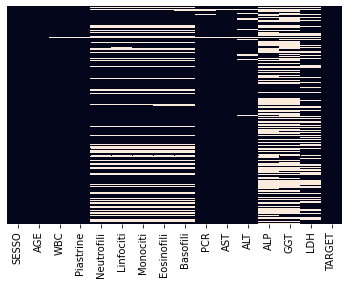

In [844]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [845]:
df.shape

(279, 16)

In [846]:
df['WBC']=df['WBC'].fillna(df['WBC'].mean())

In [847]:
df['Piastrine']=df['Piastrine'].fillna(df['Piastrine'].mean())

In [848]:
df['Neutrofili']=df['Neutrofili'].fillna(df['Neutrofili'].mean())

In [849]:
df['Linfociti']=df['Linfociti'].fillna(df['Linfociti'].mean())

In [850]:
#df["Linfociti"]= df['Linfociti'].fillna(df['Linfociti'].mode()[0])

In [851]:
df['Monociti']=df['Monociti'].fillna(df['Monociti'].mean())

In [852]:
# df["Eosinofili"]= df['Eosinofili'].fillna(df['Eosinofili'].mode()[0])

In [853]:
df["Basofili"]= df['Basofili'].fillna(df['Basofili'].mode()[0])

In [854]:


df['Eosinofili']=df['Eosinofili'].fillna(df['Eosinofili'].mean())

In [855]:
# df['Basofili']=df['Basofili'].fillna(df['Basofili'].mean())

In [856]:
df['PCR']=df['PCR'].fillna(df['PCR'].mean())

In [857]:
df['AST']=df['AST'].fillna(df['AST'].mean())

In [858]:
df['ALT']=df['ALT'].fillna(df['ALT'].mean())

In [859]:
df['ALP']=df['ALP'].fillna(df['ALP'].mean())

In [860]:
df['GGT']=df['GGT'].fillna(df['GGT'].mean())

In [861]:
df['LDH']=df['LDH'].fillna(df['LDH'].mean())

In [862]:
df.isnull().sum()

SESSO         0
AGE           0
WBC           0
Piastrine     0
Neutrofili    0
Linfociti     0
Monociti      0
Eosinofili    0
Basofili      0
PCR           0
AST           0
ALT           0
ALP           0
GGT           0
LDH           0
TARGET        0
dtype: int64

In [863]:
df['SESSO'].value_counts()

M    188
F     91
Name: SESSO, dtype: int64

In [864]:
drop_columns = ["PCR"]
df.drop(labels= drop_columns, axis=1, inplace=True)

In [865]:
# drop_columns = ["GGT"]
# df.drop(labels= drop_columns, axis=1, inplace=True)

In [866]:
# drop_columns = ["SESSO"]
# df.drop(labels= drop_columns, axis=1, inplace=True)

In [867]:
drop_columns = ["Linfociti"]
df.drop(labels= drop_columns, axis=1, inplace=True)

In [868]:
df.shape

(279, 14)

In [869]:
# Lets convert male to 0 and female to 1:
df['SESSO'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Monociti,Eosinofili,Basofili,AST,ALT,ALP,GGT,LDH,TARGET
0,0,56,2.9,128.0,1.900000,0.200000,0.000000,0.0,36.000000,18.000000,43.00000,21.000000,257.000000,1
1,0,56,3.5,151.0,2.100000,0.400000,0.000000,0.0,25.000000,14.000000,50.00000,17.000000,207.000000,1
2,0,72,4.6,206.0,6.200478,0.605742,0.055024,0.0,31.000000,22.000000,89.89313,82.477941,380.448454,1
3,0,72,16.5,316.0,14.000000,0.300000,0.000000,0.0,96.000000,33.000000,80.00000,42.000000,651.000000,1
4,0,77,4.9,198.0,6.200478,0.605742,0.055024,0.0,54.202166,44.917293,89.89313,82.477941,380.448454,1


In [870]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 13].values

**K Nearest Neighbor(KNN)**

In [478]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [479]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [253]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [254]:
y_pred = classifier.predict(x_test)

In [255]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  5]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        19
           1       0.85      0.78      0.82        37

    accuracy                           0.77        56
   macro avg       0.74      0.76      0.75        56
weighted avg       0.78      0.77      0.77        56

0.7678571428571429


In [256]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

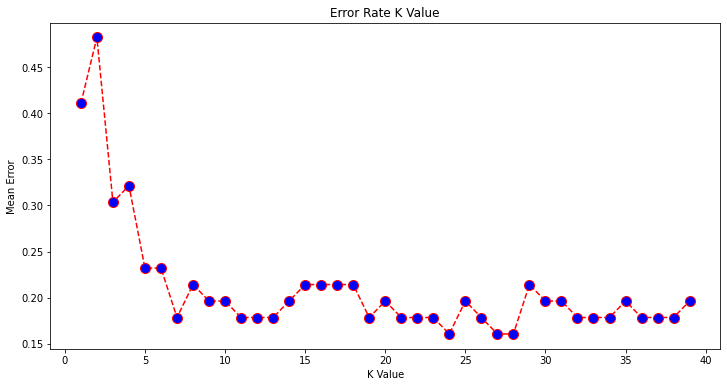

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [258]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 24)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [259]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  6]
 [ 3 34]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.85      0.92      0.88        37

    accuracy                           0.84        56
   macro avg       0.83      0.80      0.81        56
weighted avg       0.84      0.84      0.84        56

0.8392857142857143


**Decision Tree**

In [260]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [261]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
classifier # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [262]:

classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [263]:
y_pred = classifier.predict(x_test)

In [264]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.6428571428571429


**Support Vector Machine**

In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 10)

In [266]:

# Polynomial Kernel
from sklearn.svm import SVC   # Support Vector Classifier
classifier = SVC(kernel ='rbf')
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [267]:
y_pred = classifier.predict(x_test)

In [268]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 8 13]
 [ 4 31]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        21
           1       0.70      0.89      0.78        35

    accuracy                           0.70        56
   macro avg       0.69      0.63      0.63        56
weighted avg       0.69      0.70      0.67        56

0.6964285714285714


**XGBoost**

In [269]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 10)

In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
#Feature Scaling
# We'll now scale our data by creating an instance of the scaler and scaling it:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [272]:
import xgboost
classifier=xgboost.XGBClassifier()

In [273]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [274]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [275]:
from sklearn.model_selection import RandomizedSearchCV

In [276]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [277]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'b

In [278]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [279]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [280]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [281]:
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [282]:
y_pred = classifier.predict(x_test)

In [283]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [284]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[15  6]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.83      0.86      0.85        35

    accuracy                           0.80        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.80      0.80      0.80        56

0.8035714285714286


In [285]:
# Evaluating the Algorithm

# Let's find the values for these metrics using our test data. Execute the following code:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.19642857142857142
Mean Squared Error: 0.19642857142857142
Root Mean Squared Error: 0.44320263021395917


In [286]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 10)

In [287]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [288]:
y_pred = classifier.predict(x_test)

In [289]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [290]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  7]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.81      0.86      0.83        35

    accuracy                           0.79        56
   macro avg       0.77      0.76      0.77        56
weighted avg       0.78      0.79      0.78        56

0.7857142857142857


In [291]:
import re 

In [292]:
pip install catboost

In [293]:
 from catboost import CatBoostClassifier

In [294]:
import lightgbm as lgb

In [295]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 10)

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [297]:
#classifier=ExtraTreesClassifier()
#classifier = GradientBoostingClassifier()
#classifier=AdaBoostClassifier()
#classifier=RandomForestClassifier()
classifier=GradientBoostingClassifier()
#classifier=lgb.LGBMClassifier()
#classifier = BaggingClassifier()
#classifier = CatBoostClassifier()
#classifier.fit(X_train,y_train)

In [298]:
classifier = GradientBoostingClassifier()
classifier.fit(x_train, y_train) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [299]:
#import xgboost
#classifier=xgboost.XGBRFClassifier()
#classifier.fit(X_train,y_train)

In [300]:
y_pred = classifier.predict(x_test)

In [301]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  8]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.79      0.86      0.82        35

    accuracy                           0.77        56
   macro avg       0.76      0.74      0.74        56
weighted avg       0.76      0.77      0.76        56

0.7678571428571429


**Logistic Regression**

In [302]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=10)

In [303]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
LR_pred = LR.predict(x_test)

In [305]:
## Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))
print(accuracy_score(y_test, LR_pred))

[[ 9 12]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.71      0.83      0.76        35

    accuracy                           0.68        56
   macro avg       0.65      0.63      0.63        56
weighted avg       0.67      0.68      0.66        56

0.6785714285714286


**Random Forest**

In [883]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
# We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [884]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [879]:
# Train the Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [880]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [881]:
y_pred = classifier.predict(x_test)

In [882]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  6]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.85      0.92      0.88        36

    accuracy                           0.84        56
   macro avg       0.83      0.81      0.82        56
weighted avg       0.84      0.84      0.84        56

0.8392857142857143


**Naive Bayes**

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [213]:
# import Gaussian Naive Bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier 
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = gnb.predict(x_test)

In [214]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


In [ ]:
dataset['Gender'] = dataset['Gender'].astype('float')
dataset.head()

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Evaluating the Algorithm

# Let's find the values for these metrics using our test data. Execute the following code:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
y_pred.shape

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Age']
datasets.to_csv('sample_submission.csv',index=False)